# Project: Investigate a Dataset (TMBb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset desciption
This data set contains information about 10,000 movies collected from The Movie Database (TMDb) from 1960 to 2015, including user ratings and revenue.
### Questions for analysis
As the dataset it self is about movies, i thought about the following questions:
* Which 10 movie genres have the most revenue ?
* What are the top 10 most successful movie directors ?
    * Show the number of movies each year.
* what is the relationship between the release year with the ratings ?
* What kinds of properties are associeted with movies that have high revenue ?
* What are the top 10 most frequent genres?
* What is the ralationship between the budget and the revenue throught the years?
    * Which movie had the highest budget ?
    * Which movie had the lowest budget ?
    * Which movie had the highest revenue ?
    * Which movie had the lowest revenue ?
    * How the revenue tends to move with the profit ?

In [4]:
# Import the needed libraries for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [54]:
# Load the data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_m = pd.read_csv("tmdb_movies.csv")
df_m.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [40]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

By looking at the two results, we can see that the dataset has 10866 rows and 21 columns. Almost half of columns have null values like:
imdb_id, cast, homepage, director, tagline, keywords, overview, renges and production_companies.

In [41]:
# Show the number of unique values in each column
df_m.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

The above result how us that there is a possibility of only 1 duplicate when we look at the **imbd_id** columns. Howerver, if we observe better the **original_title** colums, we see that is shows the count of 10571 out of 10866. That's a problem, it means there are more duplicates in the dataset than it seems 

In [4]:
# check for null values in the dataset
df_m.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The same way we could the null values with `df_m.info()`

In [47]:
# show how the year are presented uniquely in the dataset
df_m.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [49]:
# Characteristics of some integers or floats columns in the raw data
df_m.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We see that the biggest number of _populariry_ is 32.985763 and the smallest is 0.000065 with the average of 0.646441.
The maximum of revenue is at `2.78115000000009` with the maximum budget is at `4.2500000008`.
The release year column shows that the recent year is _2015_ and the old year is _1960_. This makes sence as we descibe in the introduction.

### Data Cleaning (Clean the database to remain with the important elements for further analysis)

In [55]:
# Remove the unnecessary columns
df_m.drop(['imdb_id', 'id', 'cast', 'homepage', 'budget_adj', 'tagline', 'keywords', 'overview', 
           'vote_count', 'runtime', 'production_companies', 'revenue_adj', 'release_date'], axis = 1, inplace = True)

In [56]:
# Remove all Null values in the rows
df_m.dropna(inplace = True)

In [57]:
# Check for the changes
df_m.head()

,popularity,budget,revenue,original_title,director,genres,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,7.3,2015


In [58]:
# Rename some columns that are a little bit hard to understand
df_m.rename(columns={'original_title': 'title', 'vote_average': 'ratings'}, inplace = True)

In [59]:
### Check for changes
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10801 non-null  float64
 1   budget        10801 non-null  int64  
 2   revenue       10801 non-null  int64  
 3   title         10801 non-null  object 
 4   director      10801 non-null  object 
 5   genres        10801 non-null  object 
 6   ratings       10801 non-null  float64
 7   release_year  10801 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 759.4+ KB


After some few recent changes above, we have now 10801 rows and 8 columns. The dataste seems to show no null values in it but we will have to check that out to be sure. we will do this later!

In [60]:
# Let's arange the column in a simple way to use
df_m = df_m.reindex(columns = ['title', 'release_year', 'genres', 'director', 'popularity', 
                              'ratings', 'budget', 'revenue'])

In [61]:
# check for number of duplicates in the dataset
df_m.duplicated().sum()

1

The dataset comes up with 1 duplicate. However, as we said earlier, The number of unique values in the **title** columns is supposed to identical with the number of rows in the dataset because we want to have unique movies in the dataset. We will observe and clean this issue soon.

In [62]:
# Remove the duplicated column
df_m.drop_duplicates(inplace = True)

In [63]:
# Chek if there is still the duplicated, the result should be 'false' to mean no duplicates
df_m.duplicated().any()

False

In [64]:
# check for the changes
df_m.nunique()

title           10507
release_year       56
genres           2031
director         5056
popularity      10750
ratings            71
budget            556
revenue          4702
dtype: int64

In [65]:
# There might be duplicates in the movie title, let's check that out!
df_m['title'].duplicated().sum()

293

In [66]:
# We drop the duplicated in the movie title
df_m.drop_duplicates(subset = ['title'], inplace = True)

In [67]:
# Check for changes
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10507 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         10507 non-null  object 
 1   release_year  10507 non-null  int64  
 2   genres        10507 non-null  object 
 3   director      10507 non-null  object 
 4   popularity    10507 non-null  float64
 5   ratings       10507 non-null  float64
 6   budget        10507 non-null  int64  
 7   revenue       10507 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 738.8+ KB


After doing all the cleaning above, we are confident that our data is now clean in the way we want in order to prepare for the exploratory analysis. We end up being in need of 8 columns by ordering them as follow, _1. title, 2. release_year, 3. genres, 4. director, 5. ratings (was avarage_vote column in the raw data), 6. budget and revenue_. This column reorganisation allow the table to be concise for analyis and easy to read.

In [68]:
# Save the clean data to cvs for later use
df_m.to_csv('clean_tmbd_mv.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

In [5]:
# load the cleaned dataset and read the first row
df_m = pd.read_csv("clean_tmbd_mv.csv")
df_m.head(3)

,title,release_year,genres,director,popularity,ratings,budget,revenue
0,Jurassic World,2015,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,32.985763,6.5,150000000,1513528810
1,Mad Max: Fury Road,2015,Action|Adventure|Science Fiction|Thriller,George Miller,28.419936,7.1,150000000,378436354
2,Insurgent,2015,Adventure|Science Fiction|Thriller,Robert Schwentke,13.112507,6.3,110000000,295238201


In [6]:
# A variable that generally gives the size of each plot throught this analysis
graph_size = plt.figsize = (10, 8)

### Research Question 1  (Which 10 movie genres have the most revenue)

In [7]:
# Check if there is any row in the genres column that has the '|' character
cast_gen = df_m['genres'].str.contains('|').any()
cast_gen

True

In [8]:
# split each genres separated by |
each_gen = df_m.assign(gen = df_m['genres'].str.split('|')).explode('gen')

In [9]:
each_gen.head()

,title,release_year,genres,director,popularity,ratings,budget,revenue,gen
0,Jurassic World,2015,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,32.985763,6.5,150000000,1513528810,Action
0,Jurassic World,2015,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,32.985763,6.5,150000000,1513528810,Adventure
0,Jurassic World,2015,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,32.985763,6.5,150000000,1513528810,Science Fiction
0,Jurassic World,2015,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,32.985763,6.5,150000000,1513528810,Thriller
1,Mad Max: Fury Road,2015,Action|Adventure|Science Fiction|Thriller,George Miller,28.419936,7.1,150000000,378436354,Action


we have just created a temporaty dataset that has one more new column (the `gen` column). However, the orgiginal dataset still has its same column.

In [79]:
# Let's check that out
df_m.head()

,title,release_year,genres,director,popularity,ratings,budget,revenue,profit
0,Jurassic World,2015,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,32.985763,6.5,150000000,1513528810,1363528810
1,Mad Max: Fury Road,2015,Action|Adventure|Science Fiction|Thriller,George Miller,28.419936,7.1,150000000,378436354,228436354
2,Insurgent,2015,Adventure|Science Fiction|Thriller,Robert Schwentke,13.112507,6.3,110000000,295238201,185238201
3,Star Wars: The Force Awakens,2015,Action|Adventure|Science Fiction|Fantasy,J.J. Abrams,11.173104,7.5,200000000,2068178225,1868178225
4,Furious 7,2015,Action|Crime|Thriller,James Wan,9.335014,7.3,190000000,1506249360,1316249360


In [11]:
# check if the number of rows and columns have increased
each_gen.shape

(26061, 9)

In [17]:
# Group each genre by revenue and sort the value in descending order so we can get to most revenues genre
most_rev_gen = each_gen.groupby(['gen'])['revenue'].sum().sort_values(ascending = False)

Text(0, 0.5, 'Top 10 Genres')

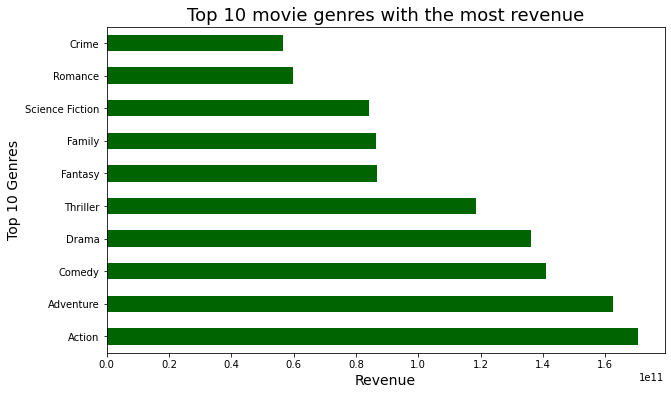

In [120]:
# Let's plot the top 10 movie genres with the most revenue
most_rev_gen.iloc[:10].plot(kind = 'barh', color = 'darkgreen', figsize = graph_size)
plt.title("Top 10 movie genres with the most revenue", fontsize = 18)
plt.xlabel("Revenue", fontsize = 14)
plt.ylabel("Top 10 Genres", fontsize = 14)

The top 10 movie genres are shown in the graph above in the oder: 1. Action, 2. Adventure, 3. Comedy, 4. Drama, 5. Thriller, 6. Fantasy, 7. Familly, 8. Science Fiction, 9. Romance, 10. Crime.

The most liked movi genre is `Action`.

### Classification
The same way we get the top 10 movie genres with the most revenue, we can also view the top **10 movies** with the most:
- Revenue
- Profit
- Buget
- Ratings
- Popularity

In [78]:
df_m['profit'] = df_m['revenue'] - df_m['budget']

In [83]:
# define a funtion for the plots of this reseach quetion
def plot_most(column, top = 10):
    sort_df = pd.DataFrame(df_m[column].sort_values(ascending=False))[:top]
    sort_df['title'] = df_m['title']
    plt.figure(figsize = (10, 8))
    sns.barplot(x = column, y = 'title', data= sort_df, label = column)
    if (column == 'profit' or column == 'budget' or column == 'revenue' or column == 'popularity', column == 'ratings'):
        plt.xlabel(column.capitalize() + ' $')
    else:
        plt.xlabel(column.capitalize())
    plt.ylabel('')
    plt.title('Top 10 Movies in with the most ' + column.capitalize())
    plt.legend()

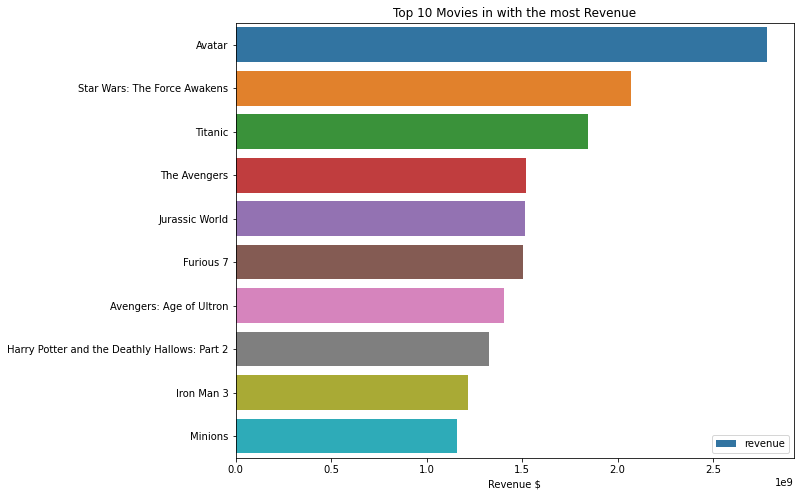

In [84]:
plot_most('revenue')

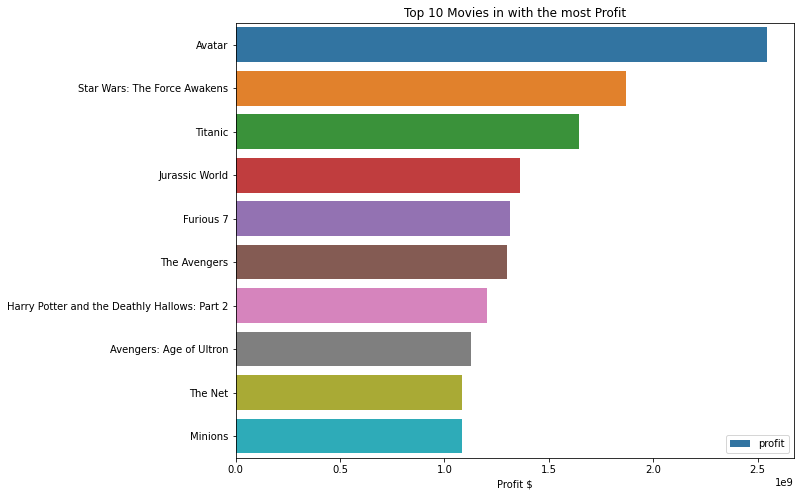

In [87]:
plot_most('profit')

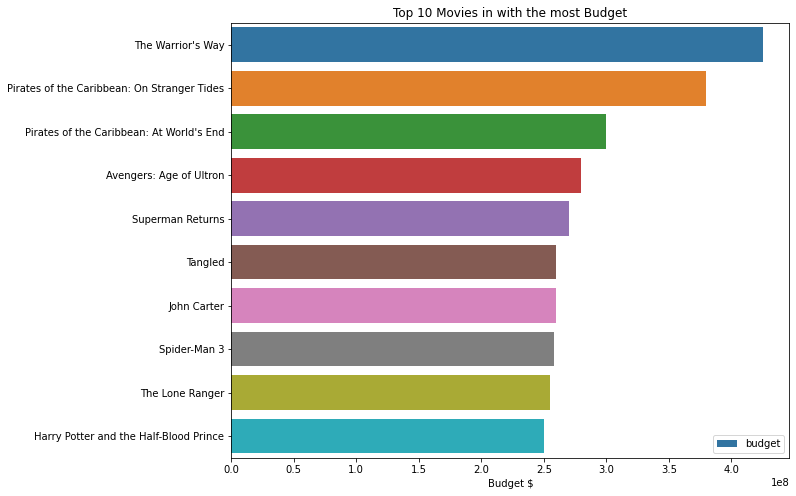

In [88]:
plot_most('budget')

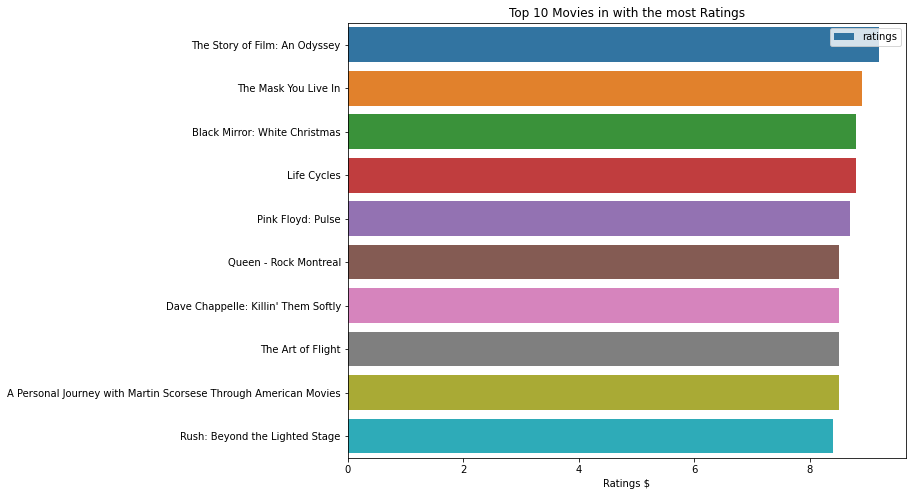

In [90]:
plot_most('ratings')

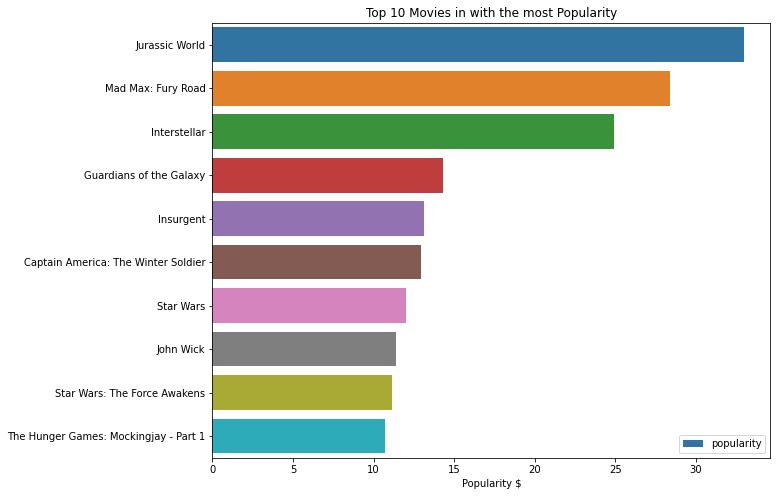

In [86]:
plot_most('popularity')

By Viewing the 4 above plots, we can conclude that, only the revenue and profit seem to work along. This is perfectly meaningful sisng the both are always depedent.

### Research Question 2 (What are the top 10 most successful movie directors?)

In [82]:
# Let's check if the column direcore contains names separated by the '|' character
# It must result True if there is any row with it
df_m['director'].str.contains('|').any()

True

In [92]:
# We split the row having the | character
each_direc = df_m.assign(direc = df_m['director'].str.split('|')).explode('direc')

In [93]:
# See how the number of rows have augmented
each_direc.shape

(11527, 9)

In [121]:
# Group each director by ratings and sort the ratings so we can get to most successful director
# the rating must be in ascending false so that it can describe the most successfull
most_direc = each_direc.groupby('direc')['ratings'].sum().sort_values(ascending = False)

Text(0, 0.5, 'Ratings')

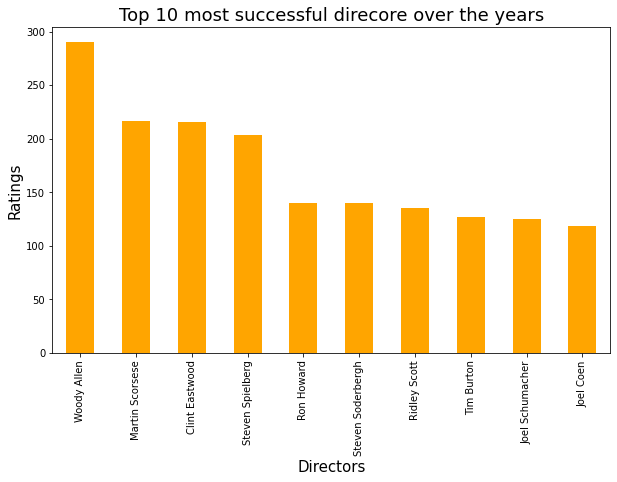

In [122]:
most_direc.iloc[:10].plot(kind = 'bar', color = 'orange', figsize = graph_size)
plt.title("Top 10 most successful direcore over the years", fontsize = 18)
plt.xlabel("Directors", fontsize = 15)
plt.ylabel("Ratings", fontsize = 15)

In the graph above, we rate the most successfull movie directors based on the ratings their movies have. We can see that **Woody Allen** at first in the top 10 followed by Mr. **MArtin Scorsese** with the tenth to be Mr. **Joel Coen**. 

Text(0, 0.5, 'Number of movies')

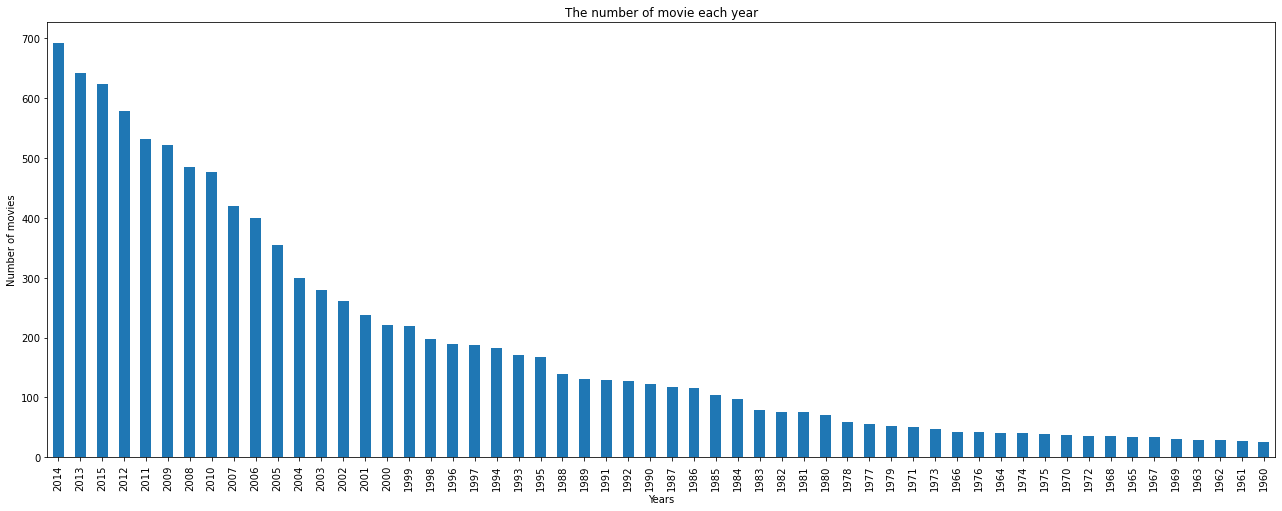

In [125]:
# Number of movies each year
df_m['release_year'].value_counts().sort_values(ascending = False).plot(kind = 'bar', figsize = (22, 8))
plt.title("The number of movie each year")
plt.xlabel("Years")
plt.ylabel("Number of movies")

The graph above shows how the number of movies each year have been increasing each year from 1960 to 2014. The more years to come the more number of movies increases. 

### Research Question 3 (What is the ralationship between the release year with the rating)

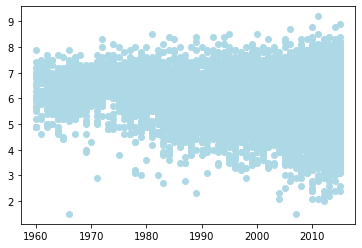

In [67]:
# Handle the years in singles
plt.scatter(x = df_m['release_year'], y = df_m['ratings'], color = "lightblue")

The scatter plot above indicates that year *does not matter* for the ratings. But we can seen that **the biggest rating** was in `2010` and **the smallest rating** was in `1967` and another one in `2008`.

### Research Question 4 (What kind of properties are associeted with movies that have high revenue?)

In [74]:
# First, need the 30 first high revenue that i will plot later
high_rev = df_m.sort_values(by = 'revenue', ascending = False).head(30)

array([[<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'popularity'}>],
       [<AxesSubplot:title={'center':'ratings'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>, <AxesSubplot:>]],
      dtype=object)

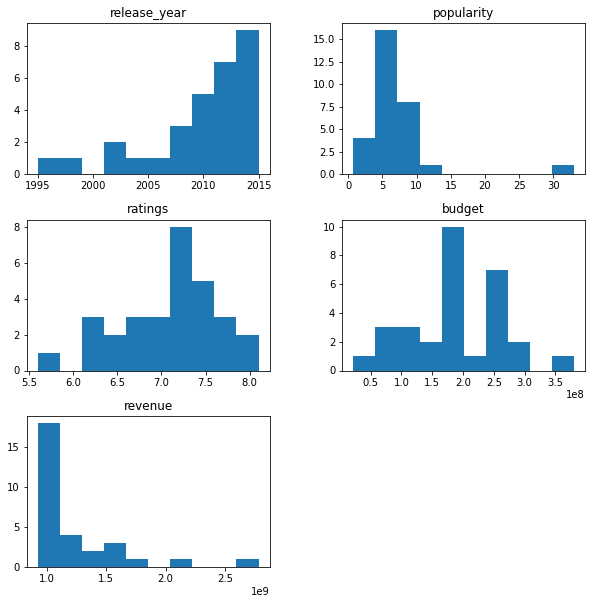

In [79]:
# plot a histogram to view the properties
high_rev.hist(figsize = (10, 10), grid = False)

The five plots above show how the ralease_year, popularity, ratings, budget and the revenue itself are associeted the the revenue

### Researach Question 5 (What are the top 10 most frequent genres?)

In [97]:
# Getting the 10 most frequent genres
most_fr = pd.Series(df_m['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
most_fr.head(10)

Drama              4618
Comedy             3720
Thriller           2796
Action             2308
Romance            1658
Horror             1557
Adventure          1420
Crime              1311
Family             1184
Science Fiction    1182
dtype: int64

### Research Question 6 (What is the ralationship between the budget and the revenue throught the years?)

Text(0.5, 1.0, 'Habits of revenue to the budget')

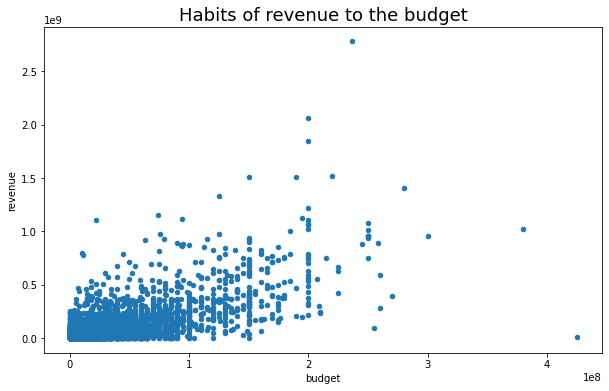

In [101]:
# Show a scatter plot demostating how the budget is with the revenue
df_m.plot(x = 'budget', y = 'revenue', figsize = graph_size, kind = 'scatter')
plt.title("Habits of revenue to the budget", fontsize = 18)

There is alitle positive correation between the budget and revenue

In [103]:
# Which movie had the highest budget?
df_high_b = df_m.sort_values(by='budget',ascending = False)
df_high_b[['title','budget']].head(1)

,title,budget
2214,The Warrior's Way,425000000


In [106]:
# Which movie had the lowest budget?
df_low_b = df_m.sort_values(by='budget',ascending = False)
df_low_b[['title','budget']].tail(1)

,title,budget
5781,Free Ride,0


In [108]:
# Which movie had the highest revenue?
df_high_r = df_m.sort_values(by='revenue',ascending = False)
df_high_r[['title','revenue']].head(1)

,title,revenue
1372,Avatar,2781505847


In [109]:
# Which movie had the lowest revenue?
df_low_r = df_m.sort_values(by='revenue',ascending = False)
df_low_r[['title','revenue']].tail(1)

,title,revenue
10506,Manos: The Hands of Fate,0


Text(0.5, 1.0, 'Relationship of revenue and profil')

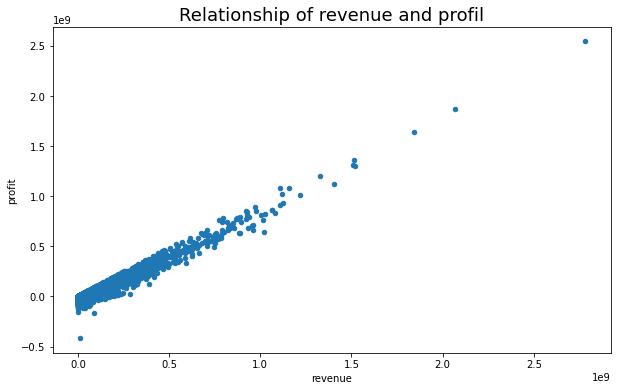

In [115]:
# Show how the revenue tends to move with the profit
df_m.plot(x = 'revenue', y = 'profit', figsize = graph_size, kind = 'scatter')
plt.title("Relationship of revenue and profil", fontsize = 18)

There is a positive correlation between the revenue and the profit. This makes sence because, the more revenue a movie gets the more profit it has.

In [128]:
df_m.query('revenue == 0')

,title,release_year,genres,director,popularity,ratings,budget,revenue,profit
48,Wild Card,2015,Thriller|Crime|Drama,Simon West,2.932340,5.3,30000000,0,-30000000
67,Survivor,2015,Crime|Thriller|Action,James McTeigue,2.331636,5.4,20000000,0,-20000000
74,Mythica: The Darkspore,2015,Action|Adventure|Fantasy,Anne K. Black,2.165433,5.1,0,0,0
75,Me and Earl and the Dying Girl,2015,Comedy|Drama,Alfonso Gomez-Rejon,2.141506,7.7,0,0,0
92,Mythica: The Necromancer,2015,Fantasy|Action|Adventure,A. Todd Smith,1.876037,5.4,0,0,0
...,...,...,...,...,...,...,...,...,...
10502,The Endless Summer,1966,Documentary,Bruce Brown,0.080598,7.4,0,0,0
10503,Grand Prix,1966,Action|Adventure|Drama,John Frankenheimer,0.065543,5.7,0,0,0
10504,Beregis Avtomobilya,1966,Mystery|Comedy,Eldar Ryazanov,0.065141,6.5,0,0,0
10505,"What's Up, Tiger Lily?",1966,Action|Comedy,Woody Allen,0.064317,5.4,0,0,0


In [129]:
df_m.query('budget == 0')

,title,release_year,genres,director,popularity,ratings,budget,revenue,profit
30,Mr. Holmes,2015,Mystery|Drama,Bill Condon,3.927333,6.4,0,29355203,29355203
36,Solace,2015,Crime|Drama|Mystery,Afonso Poyart,3.358321,6.2,0,22354572,22354572
72,Beyond the Reach,2015,Thriller,Jean-Baptiste LÃ©onetti,2.272044,5.5,0,45895,45895
74,Mythica: The Darkspore,2015,Action|Adventure|Fantasy,Anne K. Black,2.165433,5.1,0,0,0
75,Me and Earl and the Dying Girl,2015,Comedy|Drama,Alfonso Gomez-Rejon,2.141506,7.7,0,0,0
...,...,...,...,...,...,...,...,...,...
10501,Carry On Screaming!,1966,Comedy,Gerald Thomas,0.087034,7.0,0,0,0
10502,The Endless Summer,1966,Documentary,Bruce Brown,0.080598,7.4,0,0,0
10503,Grand Prix,1966,Action|Adventure|Drama,John Frankenheimer,0.065543,5.7,0,0,0
10504,Beregis Avtomobilya,1966,Mystery|Comedy,Eldar Ryazanov,0.065141,6.5,0,0,0


<a id='conclusions'></a>
## Conclusions

As results show in the analysis:
- Movie directors should focus on 1. Action, 2. Adventure, 3. Comedy, 4. Drama, 5. Thriller, 6. Fantasy, 7. Familly, 8. Science Fiction, 9. Romance, 10. and Crime because that what most people whatch.
- The number of movies have been growing povitively from 1960 to 2015. This shows how people are getting to like more movies every year coming. From year to year, the revenue increases, only between 2002 and 2007, the revenue decrease a bit.
- The revenue doesn't increase because of a movie popularity, ratings and budget.
#### Limitations in the Eploratory Data Analysis
The minimum of revenue and budget are in 0 dollars. I believe this shouldn't be that way, but i couldn't guess the minimum amount of revenue and budget respectively and i coudn't drop the revenue and budget with the value of  0 dollar neither because there are more that 5000 movies with the values of  0 dollar  revenue and budget. 